This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. The data is enriched by the addition of five social and economic features/attributes (national wide indicators from a ~10M population country). The goal is therefore binary classification  to predict if the client will subscribe a bank term deposit (variable y).

# Task 1:
#Prepare a complete data analysis report on the given data.

In [117]:
#Import relevant libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
#Load the data file
df = pd.read_csv('bank-additional-full.csv')

In [121]:
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."


In [123]:
# Reload the CSV file using semicolon as the column separator instead of the default comma
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [125]:
#Preview the data again
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [127]:
#Perform basic checks, statistics summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [131]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [133]:
#Handle unknown rows(from domain analysis)
df.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [135]:
# Perform data cleaning, Replace 'unknown' with NaN then drop the rows
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    df[col] = df[col].replace('unknown', np.nan)

In [137]:
df.dropna(inplace=True)

In [139]:
#check again if unknown were dropped
df.isin(['unknown']).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [141]:
# Drop 'duration' as it is not available before the call(from domain analysis)
df = df.drop(columns=['duration'])

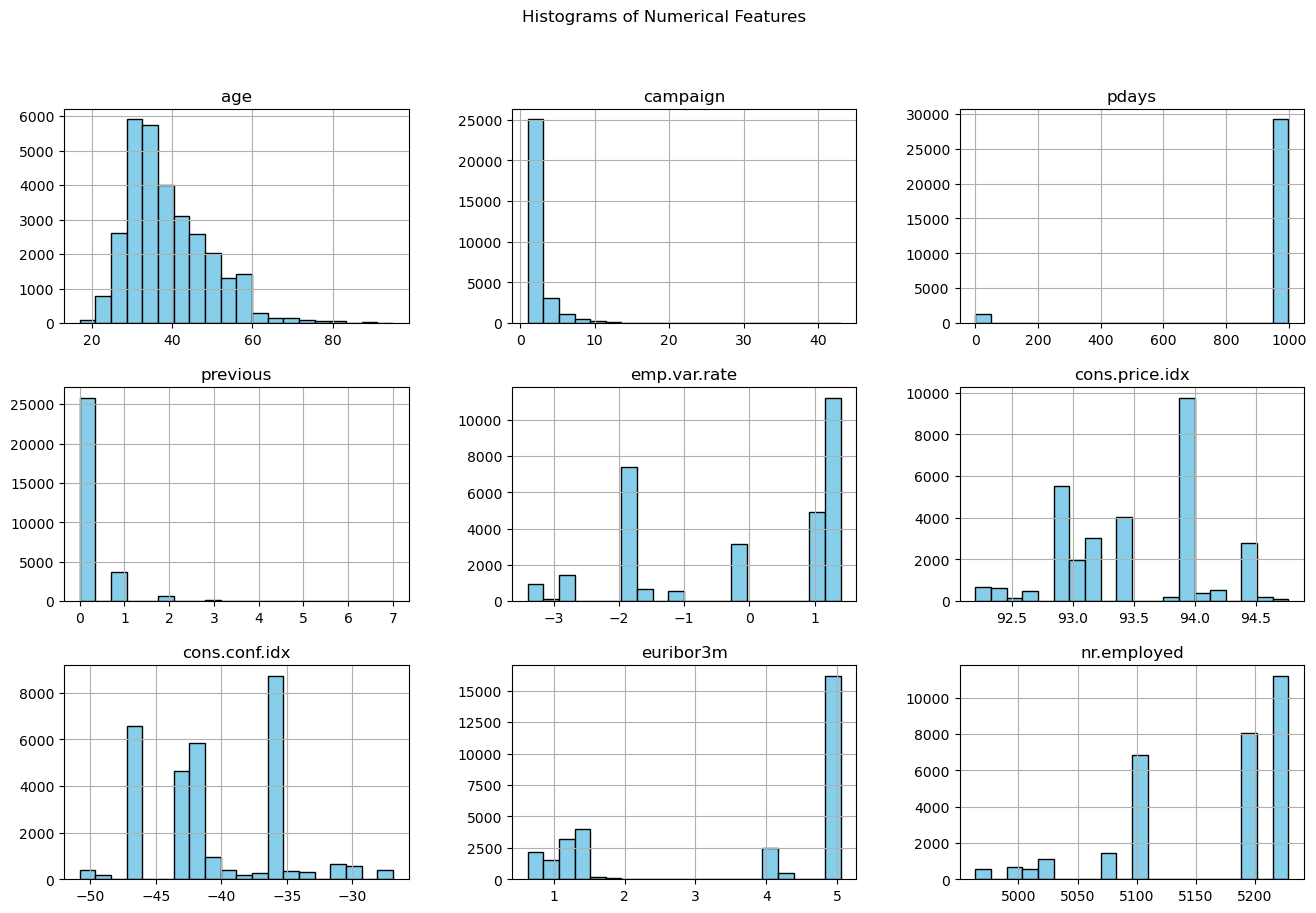

In [143]:
# Perform data analysis and visualization :
#Histogram for numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=20, figsize=(16, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Insights from the above histogram
1. Age is right-skewed — most clients are between 30–60 but highest subscriptions were aged 25 to 40.
2. Campaign is heavily skewed — most clients were contacted fewer than 5 times hence highest subscription.
3. pdays has a spike at 999 meaning many clients were never contacted before hence highest subscription.
4. nr.employed - When employment is high, there is hgher subscription

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'technician'),
  Text(4, 0, 'blue-collar'),
  Text(5, 0, 'unemployed'),
  Text(6, 0, 'retired'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'management'),
  Text(9, 0, 'student'),
  Text(10, 0, 'self-employed')])

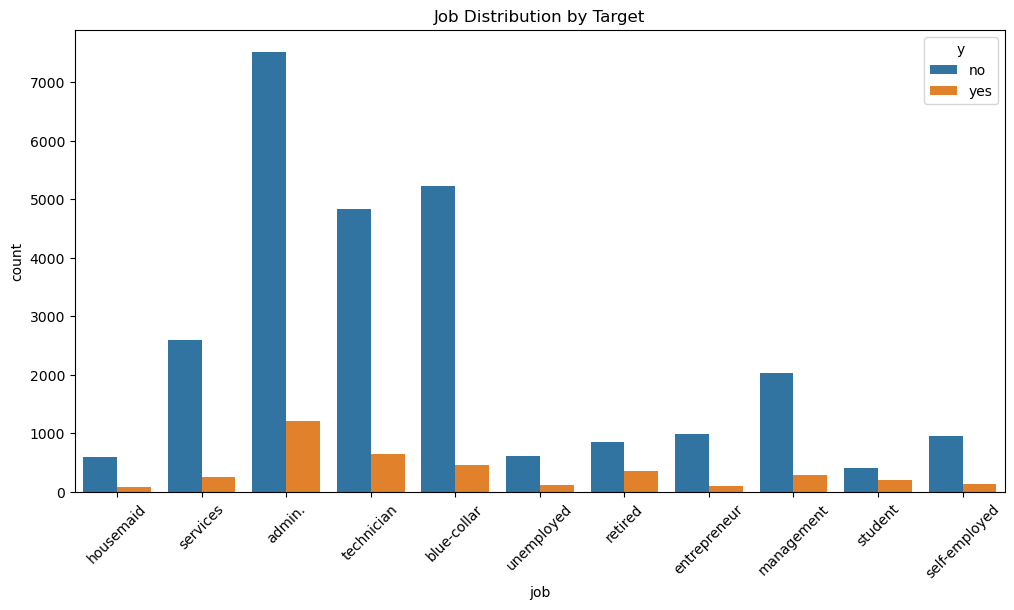

In [146]:
# Count plots for job column against target
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y')
plt.title('Job Distribution by Target')
plt.xticks(rotation=45)    

#Jobs like admin, technician, blue-collar and management have higher subscription rates but were also frequently contacted.

([0, 1, 2],
 [Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')])

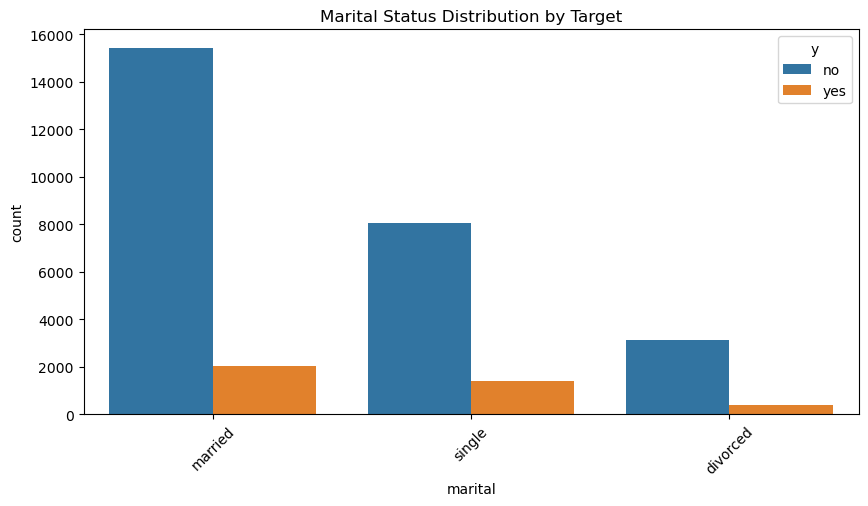

In [149]:
# Count plots for marital column against target
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Marital Status Distribution by Target')
plt.xticks(rotation=45)

#Married people are contacted most but have a lower conversion rate.

([0, 1], [Text(0, 0, 'telephone'), Text(1, 0, 'cellular')])

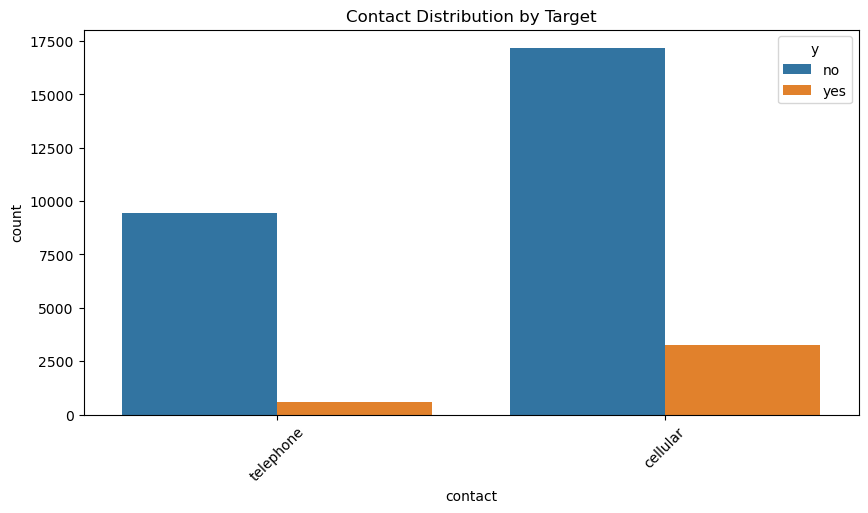

In [152]:
# Count plots for contact column against target
plt.figure(figsize=(10, 5))
ax1 = sns.countplot(data=df, x='contact', hue='y')
plt.title('Contact Distribution by Target')
plt.xticks(rotation=45)


#Contact through cellular performs better than telephone

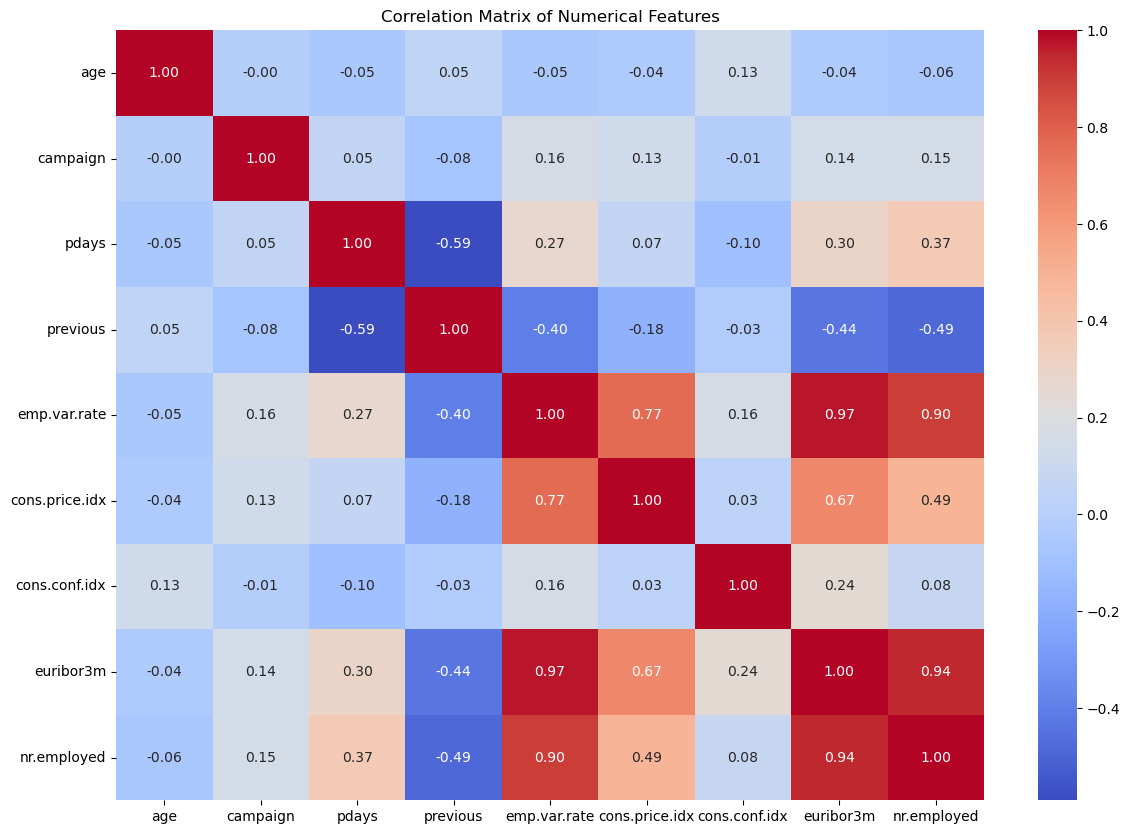

In [155]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#There is high correlation of macro-economic indicators eg euribor3m vs nr.employed, hence they can be good predictors of subscription

# Summary of Actionable Insights
1. Target younger population and single people (the married had poor conversion despite higher contact.
2. Limit call attempts(probably below 5) — too many contacts may reduce effectiveness.
3. Cellular contacts perform better — may reflect modern communication habits especially with young people.
4. Economic environment matters — campaigns during high employment conditions are more successful.

## Task 2:
#Create a predictive model which will help the bank marketing team to know which customer will buy the product.

In [199]:
#import relevant libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore") 

In [162]:
#Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    if col != 'y':
        df[col] = le.fit_transform(df[col])

In [164]:
# Encode the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [166]:
# Split data;separate the features and the target variable
X = df.drop('y', axis=1)
y = df['y']

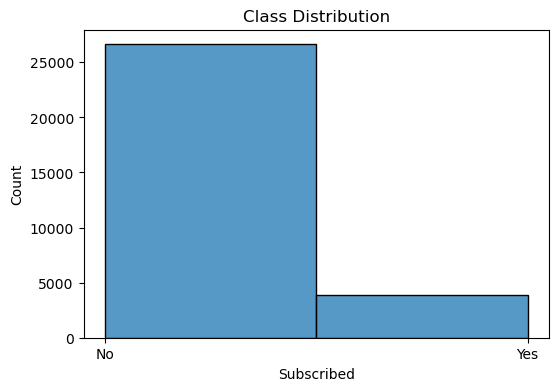

In [168]:
# Check for class(Yes and No ) imbalance
plt.figure(figsize=(6,4))
sns.histplot(y, bins=2,kde=False)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Class Distribution')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

In [170]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

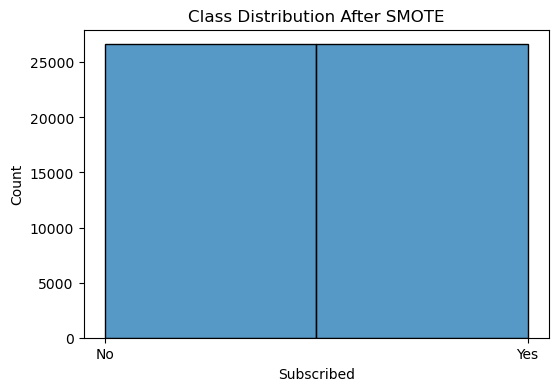

In [172]:
# Visualize class distribution after SMOTE
plt.figure(figsize=(6,4))
sns.histplot(y_resampled, bins=2, kde=False)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

In [174]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [176]:
# Standardize features from the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [178]:
# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7965
           1       0.81      0.73      0.77      8013

    accuracy                           0.78     15978
   macro avg       0.78      0.78      0.78     15978
weighted avg       0.78      0.78      0.78     15978



In [180]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7965
           1       0.91      0.90      0.91      8013

    accuracy                           0.91     15978
   macro avg       0.91      0.91      0.91     15978
weighted avg       0.91      0.91      0.91     15978



#To apply the models above with hyperparameter tuning as well as add other models for comparison.

In [185]:
# Hyperparameter tuning and training - Logistic Regression
log_params = {'C': loguniform(0.001, 100)}
log_model = RandomizedSearchCV(LogisticRegression(max_iter=1000), log_params, n_iter=10, cv=5, random_state=42, return_train_score=True)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
print("Logistic Regression Report (Tuned):")
print(classification_report(y_test, y_pred_log))

Logistic Regression Report (Tuned):
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7965
           1       0.81      0.73      0.77      8013

    accuracy                           0.78     15978
   macro avg       0.78      0.78      0.78     15978
weighted avg       0.78      0.78      0.78     15978



In [188]:
# Hyperparameter tuning and training - Random Forest
rf_params = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [189]:
rf_model = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5, random_state=42, return_train_score=True)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print("Random Forest Report (Tuned):")
print(classification_report(y_test, y_pred_rf))

Random Forest Report (Tuned):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7965
           1       0.91      0.90      0.91      8013

    accuracy                           0.91     15978
   macro avg       0.91      0.91      0.91     15978
weighted avg       0.91      0.91      0.91     15978



In [190]:
# Hyperparameter tuning and training - XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [201]:
xgb_model = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, n_iter=10, cv=5, random_state=42, return_train_score=True)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
print("XGBoost Report (Tuned):")
print(classification_report(y_test, y_pred_xgb))

XGBoost Report (Tuned):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      7965
           1       0.92      0.90      0.91      8013

    accuracy                           0.91     15978
   macro avg       0.91      0.91      0.91     15978
weighted avg       0.91      0.91      0.91     15978



In [203]:
# Comparison Table of Model Accuracy and F1-score
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy (Tuned)': [log_acc, rf_acc, xgb_acc],
    'F1-Score (Tuned)': [log_f1, rf_f1, xgb_f1]
})

In [205]:
print("\nComparison of Tuned Model Accuracy and F1-Score:")
print(results_df.to_string(index=False))


Comparison of Tuned Model Accuracy and F1-Score:
              Model  Accuracy (Tuned)  F1-Score (Tuned)
Logistic Regression          0.776693          0.765479
      Random Forest          0.908374          0.908213
            XGBoost          0.908875          0.908197


#From the report above either Random Forest or XGBoost model can be selected for production.

#Report on Challenges faced with the data:
1. Reading the csv file without default comma as column separator. I learnt different geographic regions use other column separators,in this case of Portugal it was a semi colon, therefore I had to modify the usual syntax.
2. Handling class imbalance of Yes and No on the target column which would have made an erroneous model. I used SMOTE technique to balance the data so that I do not have bias on the training of the model.